In [1]:
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 

Using TensorFlow backend.


In [2]:
img_width = 150
img_height = 150
train_data_dir = 'data/train'
valid_data_dir = 'data/validation'

In [3]:
datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size=(img_width,img_height),
                                              classes=['frustrated','confuse','bored','joy', 'shock','concentrated','neutral'],
                                              class_mode='categorical',
                                              batch_size=16)

Found 2109 images belonging to 7 classes.


In [5]:
validation_generator = datagen.flow_from_directory(directory=valid_data_dir,
                                                   target_size=(img_width,img_height),
                                                   classes=['frustrated','confuse','bored','joy','shock','concentrated','neutral'],
                                                   class_mode='categorical',
                                                   batch_size=32)

Found 745 images belonging to 7 classes.


In [6]:
#0挫折frustrated / 1困惑confuse / 2無聊bored / 3喜悅joy / 4驚訝shock / 5投入concentrated / 6中性neutral

model =Sequential()

model.add(Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('sigmoid'))

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
training = model.fit_generator(generator=train_generator, steps_per_epoch=2048 // 16,epochs=20,validation_data=validation_generator,validation_steps=832//16)
model.save_weights('models/simple_CNN.h5')

Epoch 1/20
128/128 [==============================] - 403s 3s/step - loss: 1.9359 - acc: 0.2227 - val_loss: 1.7188 - val_acc: 0.3875
Epoch 2/20
128/128 [==============================] - 366s 3s/step - loss: 1.3686 - acc: 0.5169 - val_loss: 1.2885 - val_acc: 0.6409
Epoch 3/20
128/128 [==============================] - 363s 3s/step - loss: 0.7557 - acc: 0.7354 - val_loss: 1.3372 - val_acc: 0.7151
Epoch 4/20
128/128 [==============================] - 392s 3s/step - loss: 0.4434 - acc: 0.8593 - val_loss: 1.2626 - val_acc: 0.7577
Epoch 5/20
128/128 [==============================] - 362s 3s/step - loss: 0.2567 - acc: 0.9218 - val_loss: 1.3396 - val_acc: 0.7515
Epoch 6/20
128/128 [==============================] - 355s 3s/step - loss: 0.1990 - acc: 0.9408 - val_loss: 1.8091 - val_acc: 0.7517
Epoch 7/20
128/128 [==============================] - 361s 3s/step - loss: 0.1452 - acc: 0.9546 - val_loss: 1.6808 - val_acc: 0.7831
Epoch 8/20
128/128 [==============================] - 366s 3s/step - 

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(training.history[train_acc])
    plt.plot(training.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

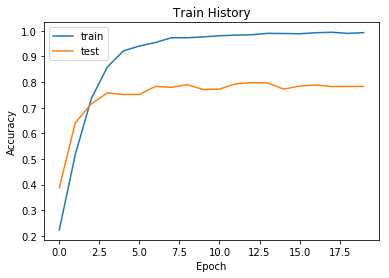

In [10]:
show_train_history('acc','val_acc')

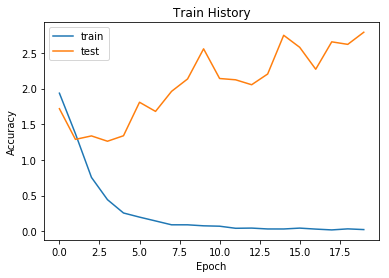

In [11]:
show_train_history('loss','val_loss')